In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score

In [2]:
model = joblib.load("best_model.pkl")
model_features = joblib.load("model_features.pkl")

df = pd.read_csv("sample_predict_data.csv")
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_03619,738,TCP,3,207.714612,AES,0.126325,0,Chrome,1,0
1,SID_04248,939,ICMP,4,53.070206,AES,0.533248,0,Firefox,0,1
2,SID_09246,347,TCP,8,792.754984,AES,0.336661,1,Firefox,1,1
3,SID_05156,497,TCP,5,125.181472,AES,0.708134,2,Firefox,0,1
4,SID_03112,443,TCP,3,1646.537424,NaN,0.086928,2,Chrome,0,0


In [3]:
protocol_map = {"TCP": 0,"UDP": 1,"ICMP": 2}
encryption_map = {"DES": 0,"AES": 1,"NoEncryption": 2}
browser_map = {"Edge": 0,"Firefox": 1,"Chrome": 2,"Safari": 3,"Unknown": 4}
df['encryption_used'] = df['encryption_used'].fillna("NoEncryption")
df["protocol_type"] = df["protocol_type"].map(protocol_map)
df["encryption_used"] = df["encryption_used"].map(encryption_map)
df["browser_type"] = df["browser_type"].map(browser_map)
df = df.drop(columns=["session_id"])

In [4]:
X = df.drop(columns=["attack_detected"])[model_features]
y = df["attack_detected"]
print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


In [5]:
y_pred = model.predict(X)
df["attack_predicted"] = y_pred
df

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,attack_predicted
0,738,0,3,207.714612,1,0.126325,0,2,1,0,0
1,939,2,4,53.070206,1,0.533248,0,1,0,1,1
2,347,0,8,792.754984,1,0.336661,1,1,1,1,1
3,497,0,5,125.181472,1,0.708134,2,1,0,1,1
4,443,0,3,1646.537424,2,0.086928,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,695,1,6,1914.488524,0,0.480342,2,0,0,1,0
996,491,0,4,1075.554348,2,0.446526,3,1,0,1,1
997,565,1,1,768.156460,0,0.243987,1,2,0,0,0
998,658,0,3,935.441647,1,0.125133,3,2,0,1,1


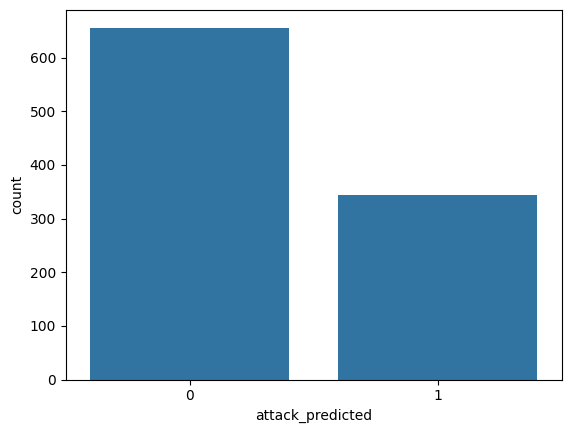

In [6]:
sns.countplot(x = "attack_predicted", data = df);